In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [492]:
from utils import Data, Say
from load import Load
import pandas as pd

import resume 

say = Say()
load = Load(path="in")
data = Data(path="in")
try:
    labels = data.get_labels(path="in")
    data_dict = load.load_datasets_from_csv(path="in")
except ValueError:
    say.cow_says_error('Error al cargar base de datos')

data_dict = resume.dataset_date_iter(data_dict, labels)


 _____________________________________________________ 
< Clientes do not have [Fecha, Fecha_Entrega] columns > 
 ----------------------------------------------------- 
        \   ^__^ 
         \  (oo)\_______ 
            (__)\  error )\/\ 
                ||----w | 
                ||     || 
 ______________________________________ 
< Se cambio la columna Fecha en Compra > 
 -------------------------------------- 
        \   ^__^ 
         \  (oo)\_______ 
            (__)\  good )\/\ 
                ||----w | 
                ||     || 
 _____________________________________ 
< Se cambio la columna Fecha en Gasto > 
 ------------------------------------- 
        \   ^__^ 
         \  (oo)\_______ 
            (__)\  good )\/\ 
                ||----w | 
                ||     || 
 ________________________________________________________ 
< Localidades do not have [Fecha, Fecha_Entrega] columns > 
 -------------------------------------------------------- 
        \   ^__^ 
     

In [493]:
def null_review(dataframe):
    null_serie = dataframe.isnull().sum()
    null_serie = null_serie[null_serie != 0]
    return null_serie

def null_percentage(dataframe):
    null_serie = null_review(dataframe)
    total = dataframe.shape[0]
    null_dict = {}
    for i in range(null_serie.size):
        percent = round(null_serie.values[i]*100/total,2)
        null_dict[null_serie.index[i]] = percent

    return null_dict

In [494]:
df_venta = data_dict['Venta']

In [521]:
from scipy import stats


def outlier_detect(df):
    ban_list = ['Telefono','X','Y','Latitud','Longitud']
    z_dict = {}
    outlier_dict={}
    for col in df.columns:
        if df[col].dtypes == np.float64:
            if col in ban_list:
                continue
            else:
                z = np.abs(stats.zscore(df[col].dropna()))
                z_dict[col] = z

                outlier_dict[col] = z_dict[col][z_dict[col] > 3]
    return outlier_dict
        


    

In [563]:
def outlier_percent(df):
    percent_outlier_dict={}
    outlier_dict = outlier_detect(df)
    total = df.shape[0]

    for i in range(len(outlier_dict.keys())):
        percent = len(list(outlier_dict.values())[i])*100/total
        percent_outlier_dict[list(outlier_dict.keys())[i]] = percent

    return percent_outlier_dict

In [564]:
outlier_percent(df_venta)



{'Precio': 0.028150714595062798, 'Cantidad': 1.504980511043742}

In [537]:
z = np.abs(stats.zscore(df_venta['Cantidad'].dropna()))
z[z > 3]



19       7.751744
83       4.944337
100      4.944337
154      4.944337
159      4.944337
           ...   
45747    4.944337
45976    4.944337
46141    4.944337
46161    4.944337
46162    4.944337
Name: Cantidad, Length: 695, dtype: float64

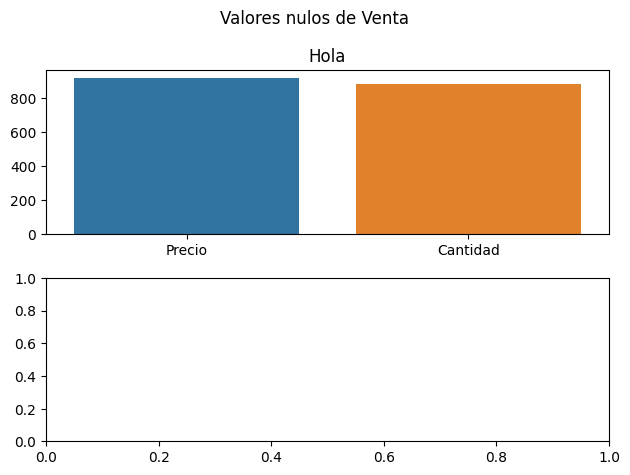

In [207]:
null, axs = plt.subplots(2,1)
null.suptitle(f'Valores nulos de {labels[-1]}')
axs[0].set_title('Hola')
sns.barplot(ax=axs[0],x=dt.index,y=dt.values)
plt.tight_layout()
plt.show()

In [288]:
df_localidades = pd.read_csv('in/Localidades.csv')
df_localidades.head(5)

,categoria,centroide_lat,centroide_lon,departamento_id,departamento_nombre,fuente,id,localidad_censal_id,localidad_censal_nombre,municipio_id,municipio_nombre,nombre,provincia_id,provincia_nombre
0,Localidad simple,-35.033073,-60.280620,6021.0,Alberti,INDEC,6021010000,6021010,Alberti,60021.0,Alberti,ALBERTI,6,Buenos Aires
1,Localidad simple,-34.868119,-60.393971,6021.0,Alberti,INDEC,6021020000,6021020,Coronel Seguí,60021.0,Alberti,CORONEL SEGUI,6,Buenos Aires
2,Componente de localidad compuesta,-35.068014,-60.402597,6021.0,Alberti,INDEC,6021030000,6021030,Mechita,60021.0,Alberti,MECHITA,6,Buenos Aires
3,Localidad simple,-35.124382,-60.220061,6021.0,Alberti,INDEC,6021040000,6021040,Pla,60021.0,Alberti,PLA,6,Buenos Aires
4,Localidad simple,-35.109618,-60.070551,6021.0,Alberti,INDEC,6021050000,6021050,Villa Grisolía,60021.0,Alberti,VILLA GRISOLIA,6,Buenos Aires


In [298]:
df_localidades.departamento_nombre.unique()
df_localidades.municipio_nombre.unique()
df_localidades.localidad_censal_nombre.unique()
df_localidades.provincia_nombre.unique()


array(['Buenos Aires', 'Catamarca', 'Córdoba', 'Corrientes', 'Chaco',
       'Chubut', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja',
       'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan',
       'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero',
       'Tucumán', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur'],
      dtype=object)

In [334]:
df_sucursales = pd.read_csv('in/Sucursales.csv', sep=';')
buenos_aires = ['Ciudad de Buenos Aires', 'CABA', 'C deBuenos Aires', 'Bs As', 'Bs.As. ', 'Buenos Aires', 'B. Aires', 'B.Aires', 'Provincia de Buenos Aires', 'Prov de Bs As.', 'Pcia Bs AS']


In [ ]:
df_sucursales[['Latitud','Longitud']] = pd.to_numeric(df_sucursales[['Latitud','Longitud']], errors = "coerce")
df_sucursales[['Latitud','Longitud']] = df_sucursales[['Latitud','Longitud']].replace(np.nan, 0, regex=True)

df_sucursales[['Latitud','Longitud']].dtypes


In [318]:
cord_label = ['Latitud','Longitud']



'Latitud'

In [337]:
df_sucursales.Latitud.head()

0    -34,5678060
1    -34,5790350
2    -34,5959660
3    -34,6046850
4    -34,6173080
Name: Latitud, dtype: object

In [376]:
df_sucursales = pd.read_csv('in/Sucursales.csv', sep=';')

In [377]:
cord_label = ['Latitud','Longitud']
for label in cord_label:
    df_sucursales[label] = df_sucursales[label].replace(',','.',regex=True)   
    df_sucursales[label] = df_sucursales[label].astype(float)
    df_sucursales[label] = df_sucursales[label].apply(lambda x : -x if x > 0 else x )

df_sucursales.Longitud.head()


0   -58.449572
1   -58.433566
2   -58.405150
3   -58.398764
4   -58.416179
Name: Longitud, dtype: float64

In [384]:
df_clientes = pd.read_csv('in/Clientes.csv', sep=';')


In [386]:
cord_label = ['X','Y']
for label in cord_label:
    df_clientes[label] = df_clientes[label].replace(',','.',regex=True)   
    df_clientes[label] = df_clientes[label].replace('',np.nan,regex=True)
    df_clientes[label] = pd.to_numeric(df_clientes[label], errors='coerce')
    df_clientes[label] = df_clientes[label].apply(lambda x : -x if x > 0 else x )



0   -58.818503
1   -58.730738
2   -59.127941
3   -58.143940
4   -58.893810
Name: X, dtype: float64

In [422]:
df_clientes = pd.read_csv('in/Clientes.csv', sep=';')


In [427]:
df_clientes['Telefono'] = df_clientes['Telefono'].replace('-','', regex= True)
df_clientes['Telefono'] = df_clientes['Telefono'].replace('/','', regex= True)
df_clientes['Telefono'] = df_clientes['Telefono'].replace(' ','', regex= True)
df_clientes['Telefono'] = pd.to_numeric(df_clientes['Telefono'], errors='coerce',downcast='integer')


In [431]:
df_clientes['Edad'] = pd.to_numeric(df_clientes['Edad'])
df_clientes['Edad'].head()

0    58.0
1    61.0
2    15.0
3    29.0
4    34.0
Name: Edad, dtype: float64